In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (replace 'amazon_sales_data.csv' with your dataset file)
df = pd.read_csv('C:\\Users\\Dell\\Downloads\\amazon sales data.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
                              Region                Country        Item Type  \
0              Australia and Oceania                 Tuvalu        Baby Food   
1  Central America and the Caribbean                Grenada           Cereal   
2                             Europe                 Russia  Office Supplies   
3                 Sub-Saharan Africa  Sao Tome and Principe           Fruits   
4                 Sub-Saharan Africa                 Rwanda  Office Supplies   

  Sales Channel Order Priority Order Date   Order ID  Ship Date  Units Sold  \
0       Offline              H  5/28/2010  669165933  6/27/2010        9925   
1        Online              C  8/22/2012  963881480  9/15/2012        2804   
2       Offline              L   5/2/2014  341417157   5/8/2014        1779   
3        Online              C  6/20/2014  514321792   7/5/2014        8102   
4       Offline              L   2/1/2013  115456712   2/6/2013        5062   

   Unit Price

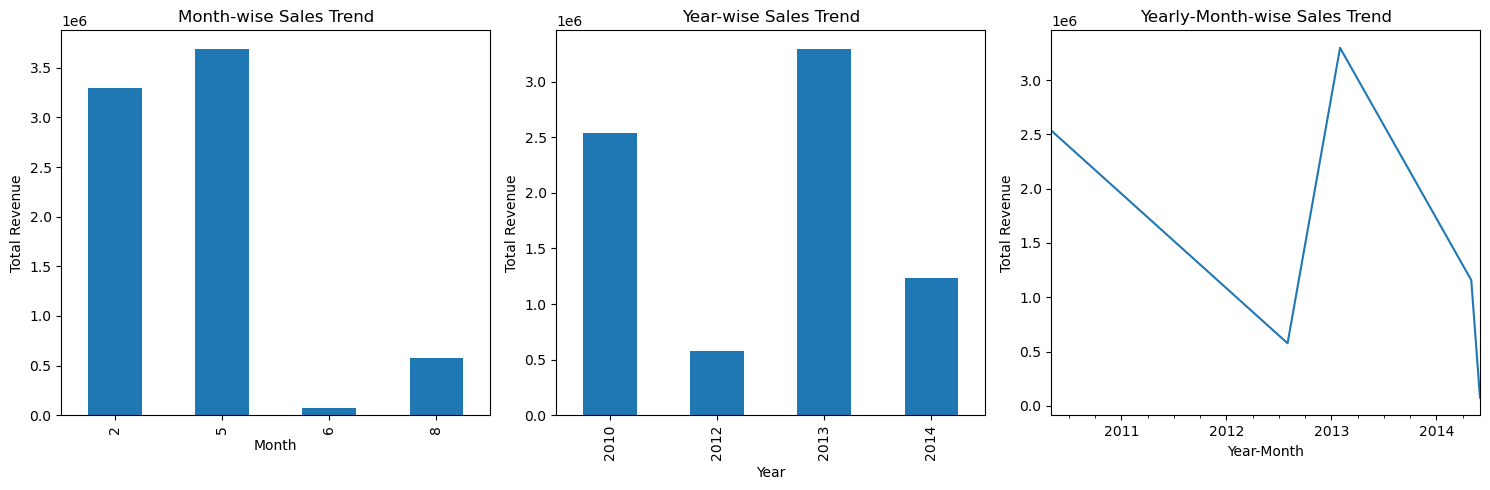

Key Metrics:
            Total Revenue  Total Profit  Units Sold
Year Month                                         
2010 5         2533654.00     951410.50        9925
2012 8          576782.80     248406.36        2804
2013 2         3296425.02     639077.50        5062
2014 5         1158502.59     224598.75        1779
     6           75591.66      19525.82        8102


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the data as a dictionary
data = {
    'Region': ['Australia and Oceania', 'Central America and the Caribbean', 'Europe', 'Sub-Saharan Africa', 'Sub-Saharan Africa'],
    'Country': ['Tuvalu', 'Grenada', 'Russia', 'Sao Tome and Principe', 'Rwanda'],
    'Item Type': ['Baby Food', 'Cereal', 'Office Supplies', 'Fruits', 'Office Supplies'],
    'Sales Channel': ['Offline', 'Online', 'Offline', 'Online', 'Offline'],
    'Order Priority': ['H', 'C', 'L', 'C', 'L'],
    'Order Date': ['5/28/2010', '8/22/2012', '5/2/2014', '6/20/2014', '2/1/2013'],
    'Order ID': [669165933, 963881480, 341417157, 514321792, 115456712],
    'Ship Date': ['6/27/2010', '9/15/2012', '5/8/2014', '7/5/2014', '2/6/2013'],
    'Units Sold': [9925, 2804, 1779, 8102, 5062],
    'Unit Price': [255.28, 205.70, 651.21, 9.33, 651.21],
    'Unit Cost': [159.42, 117.11, 524.96, 6.92, 524.96],
    'Total Revenue': [2533654.00, 576782.80, 1158502.59, 75591.66, 3296425.02],
    'Total Cost': [1582243.50, 328376.44, 933903.84, 56065.84, 2657347.52],
    'Total Profit': [951410.50, 248406.36, 224598.75, 19525.82, 639077.50]
}

# Create DataFrame
df = pd.DataFrame(data)

# Convert the 'Order Date' column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract year, month, and year-month from 'Order Date'
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Year_Month'] = df['Order Date'].dt.to_period('M')

# Sales trend month-wise
monthly_sales = df.groupby('Month')['Total Revenue'].sum()

# Sales trend year-wise
yearly_sales = df.groupby('Year')['Total Revenue'].sum()

# Sales trend yearly-month-wise
yearly_monthly_sales = df.groupby('Year_Month')['Total Revenue'].sum()

# Plotting sales trends
plt.figure(figsize=(15, 5))

# Month-wise sales trend
plt.subplot(1, 3, 1)
monthly_sales.plot(kind='bar')
plt.title('Month-wise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')

# Year-wise sales trend
plt.subplot(1, 3, 2)
yearly_sales.plot(kind='bar')
plt.title('Year-wise Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue')

# Yearly-month-wise sales trend
plt.subplot(1, 3, 3)
yearly_monthly_sales.plot(kind='line')
plt.title('Yearly-Month-wise Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')

plt.tight_layout()
plt.show()

# Key metrics and relationships
key_metrics = df.groupby(['Year', 'Month']).agg({
    'Total Revenue': 'sum',
    'Total Profit': 'sum',
    'Units Sold': 'sum'
})

# Print key metrics
print("Key Metrics:")
print(key_metrics)

# Save the key metrics to a CSV file
key_metrics.to_csv('key_metrics.csv')
